<a href="https://colab.research.google.com/github/sKazmierczyk/Projekt1/blob/main/Podzielone%20na%20men%20women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('drive/MyDrive/Data_ML.csv')

In [7]:
new_data = data.copy()
new_data = new_data.drop('Unnamed: 0', axis=1)
new_data =new_data.drop('HaveWorkedWith', axis=1) # droping unnessesery datas

# Transformation of 'age'(1-age>35, 0-age<=35)
new_data['Age'] = (data['Age'] == '>35')

# Transformation of 'Accessibility' (1-Yes, 0-No)
new_data['Accessibility'] = (data['Accessibility'] == 'Yes')

# Transformation of 'EdLevel'
ed_level_mapping = {'Master': 1, 'Undergraduate': 2, 'PhD': 3, 'Other': 4, 'NoHigherEd': 0}
new_data['EdLevel'] = data['EdLevel'].map(ed_level_mapping)

# Transformation of 'Employment' (1-employed, 0-not employed)
new_data['Employment'] = (data['Employment'] == 1)

# Transformation of 'Gender'
gender_mapping = {'Man': 1, 'Woman': 2, 'Nonbinary': 0}
new_data['Gender'] = data['Gender'].map(gender_mapping)

# Transformation of'MentalHealth' (1-Yes, 0-No)
new_data['MentalHealth'] = (data['MentalHealth'] == 'Yes')

# Transformation of 'MainBranch'(1-Dev, 0-NotDev)
new_data['MainBranch'] = (data['MainBranch'] == 'Dev')




# Transformation of 'Employed'(1-Employed, 0-Not Employed)
new_data['Employed'] = data['Employed']

print(new_data)

         Age  Accessibility  EdLevel  Employment  Gender  MentalHealth  \
0      False          False        1        True     1.0         False   
1      False          False        2        True     1.0         False   
2      False          False        1        True     1.0         False   
3      False          False        2        True     1.0         False   
4       True          False        3       False     1.0         False   
...      ...            ...      ...         ...     ...           ...   
73457  False          False        2        True     1.0         False   
73458   True          False        2        True     1.0         False   
73459  False          False        2        True     1.0         False   
73460  False           True        2        True     1.0          True   
73461  False          False        1        True     NaN         False   

       MainBranch  YearsCode  YearsCodePro  \
0            True          7             4   
1            True  

In [31]:
new_data = new_data[new_data['Gender'] != 0]

filtred_data = new_data.drop(['Age', 'Accessibility', 'Employment', 'MentalHealth', 'Employed'], axis=1)


countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France',
    'Germany', 'Hong Kong', 'Iceland', 'Ireland', 'Israel', 'Japan', 'Liechtenstein',
    'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Singapore',
    'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
    'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Italy', 'Czech Republic', 'Slovakia',
    'Greece', 'Taiwan', 'Hong Kong', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Estonia']


filtred_data['developed'] = filtred_data['Country'].isin(countries)
filtred_data = filtred_data.drop('Country', axis=1)

data_man = filtred_data[filtred_data['Gender'] == 1]
data_dev_man = data_man[data_man['developed'] == True]
data_ndev_man = data_man[data_man['developed'] == False]
#data_dev_man = data_dev_man.drop(['MainBranch', 'Gender', 'YearsCode', 'ComputerSkills', 'EdLevel'] , axis =  1)
#data_ndev_man = data_ndev_man.drop(['MainBranch', 'Gender', 'YearsCode', 'ComputerSkills', 'EdLevel'] , axis =  1)
dev_man_salary = data_dev_man['PreviousSalary']
ndev_man_salary = data_ndev_man['PreviousSalary']
data_dev_man = data_dev_man.drop('PreviousSalary', axis = 1)
data_ndev_man = data_ndev_man.drop('PreviousSalary', axis = 1)

data_woman = filtred_data[filtred_data['Gender'] == 2]
data_dev_woman = data_woman[data_woman['developed'] == True]
data_ndev_woman = data_woman[data_woman['developed'] == False]
#data_dev_man = data_dev_man.drop(['MainBranch', 'Gender', 'YearsCode', 'ComputerSkills', 'EdLevel'] , axis =  1)
#data_ndev_man = data_ndev_man.drop(['MainBranch', 'Gender', 'YearsCode', 'ComputerSkills', 'EdLevel'] , axis =  1)
dev_woman_salary = data_dev_woman['PreviousSalary']
ndev_woman_salary = data_ndev_woman['PreviousSalary']
data_dev_woman = data_dev_woman.drop('PreviousSalary', axis = 1)
data_ndev_woman = data_ndev_woman.drop('PreviousSalary', axis = 1)


In [42]:
data_dev_woman.count()

EdLevel           2519
Gender            2519
MainBranch        2519
YearsCode         2519
YearsCodePro      2519
ComputerSkills    2519
developed         2519
dtype: int64

In [28]:
x_train, x_val, x_test = np.split(data_dev_man.sample(frac=1, random_state = 20), [int(.6*len(data_dev_man)), int(.8*len(data_dev_man))])
y_train, y_val, y_test = np.split(dev_man_salary.sample(frac=1, random_state = 20), [int(.6*len(dev_man_salary)), int(.8*len(dev_man_salary))])

In [32]:
x_train, x_val, x_test = np.split(data_dev_woman.sample(frac=1, random_state = 20), [int(.6*len(data_dev_woman)), int(.8*len(data_dev_woman))])
y_train, y_val, y_test = np.split(dev_woman_salary.sample(frac=1, random_state = 20), [int(.6*len(dev_woman_salary)), int(.8*len(dev_woman_salary))])

In [43]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_val)
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
print(rmse_train, ' ', rmse_val)

43324.00385149343   45100.60298965563


In [33]:
reg = MLPRegressor(hidden_layer_sizes=(12, 10, 5), random_state=1, max_iter=5000, solver='adam')
reg.fit(x_train, y_train)
y_pred1_train = reg.predict(x_train)
y_pred1 = reg.predict(x_val)
rmse = np.sqrt(np.mean((y_pred1_train - y_train)**2))
print(rmse)

43362.14863207466


Text(0, 0.5, 'y_val')

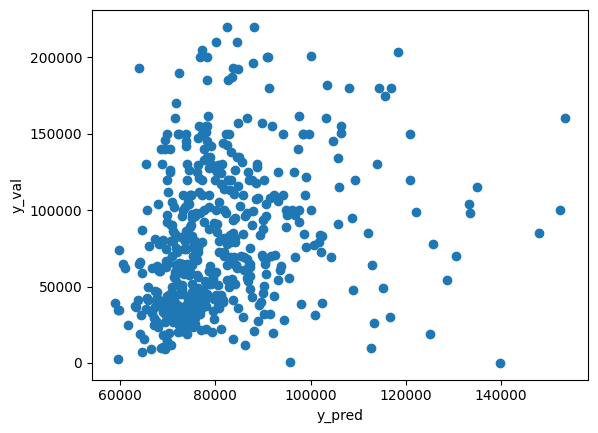

In [44]:
plt.scatter(y_pred, y_val)
plt.xlabel('y_pred')
plt.ylabel('y_val')



(array([14325., 14221., 14008., 10259.,  7178.,  4772.,  3749.,  2182.,
         1993.,   775.]),
 array([1.000000e+00, 2.240090e+04, 4.480080e+04, 6.720070e+04,
        8.960060e+04, 1.120005e+05, 1.344004e+05, 1.568003e+05,
        1.792002e+05, 2.016001e+05, 2.240000e+05]),
 <BarContainer object of 10 artists>)

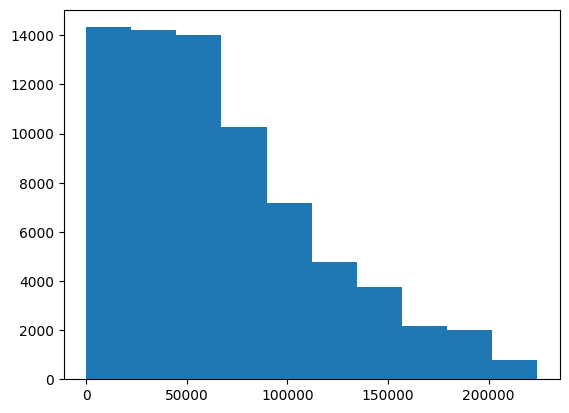

In [23]:
plt.hist(salary)

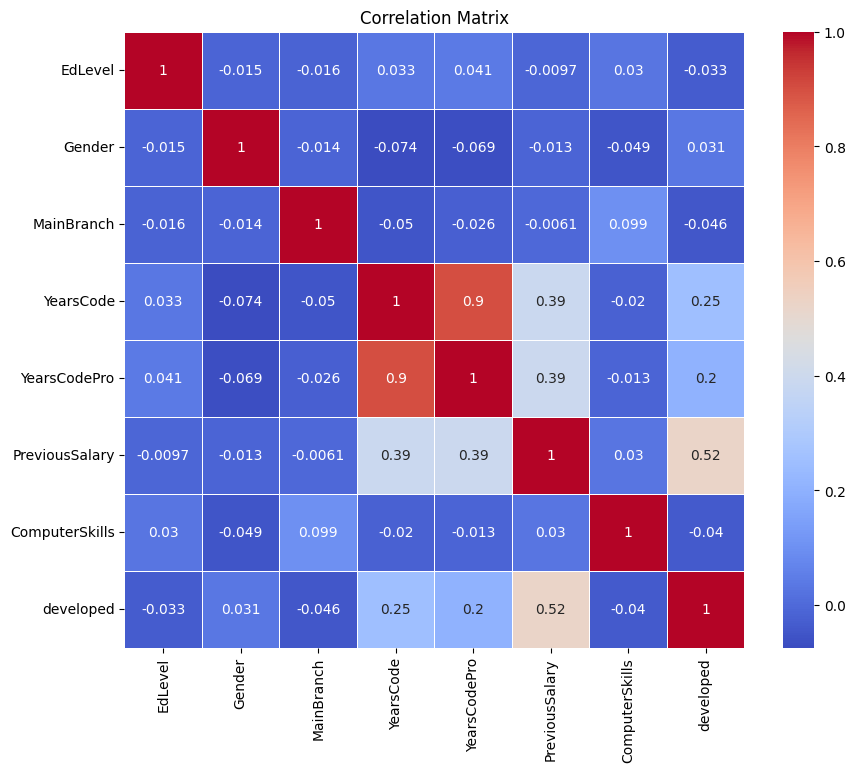

In [22]:
correlation_matrix = filtred_data.corr()

# Creating corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

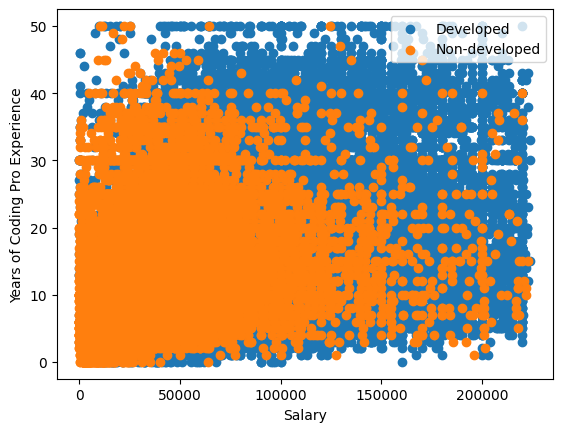

In [ ]:

plt.scatter(data_dev_man['PreviousSalary'], data_dev_man['YearsCode'], label='Developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')
plt.scatter(data_ndev_man['PreviousSalary'], data_ndev_man['YearsCode'], label='Non-developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')

plt.legend()

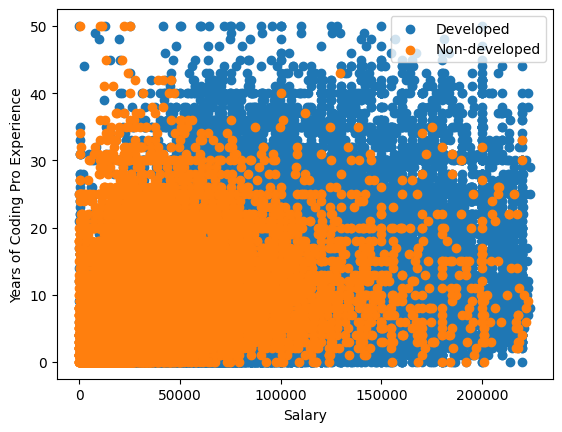

In [ ]:
plt.scatter(data_dev_man['PreviousSalary'], data_dev_man['YearsCodePro'], label='Developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')
plt.scatter(data_ndev_man['PreviousSalary'], data_ndev_man['YearsCodePro'], label='Non-developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')

plt.legend()

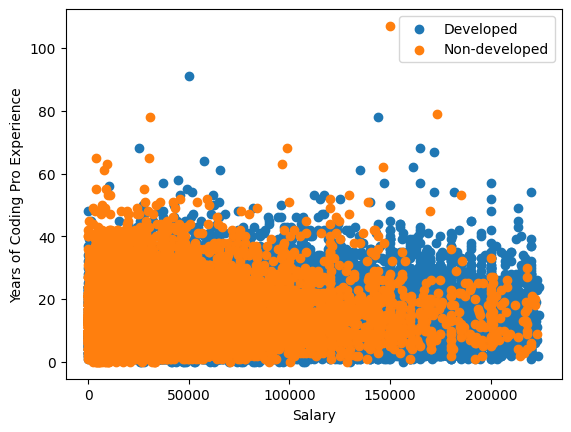

In [ ]:
plt.scatter(data_dev_man['PreviousSalary'], data_dev_man['ComputerSkills'], label='Developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')
plt.scatter(data_ndev_man['PreviousSalary'], data_ndev_man['ComputerSkills'], label='Non-developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')

plt.legend()

In [ ]:
data_ndev_man.head(100)

,EdLevel,Gender,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,developed
9,1,1.0,True,20,16,37752.0,6,False
11,2,1.0,True,6,2,11832.0,13,False
15,2,1.0,True,22,15,60480.0,16,False
16,4,1.0,True,7,1,20556.0,5,False
20,4,1.0,False,5,3,22644.0,12,False
...,...,...,...,...,...,...,...,...
355,1,1.0,True,2,1,6852.0,14,False
357,1,1.0,True,10,8,46644.0,20,False
363,1,1.0,True,12,4,24300.0,17,False
367,0,1.0,True,15,9,30000.0,14,False


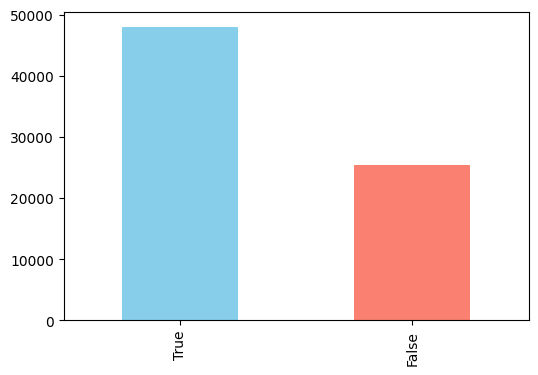

In [ ]:

# Liczenie wystąpień wartości True i False w kolumnie 'developed'
count_values = filtred_data['developed'].value_counts()

# Tworzenie wykresu słupkowego
plt.figure(figsize=(6, 4))
count_values.plot(kind='bar', color=['skyblue', 'salmon'])

plt.show()

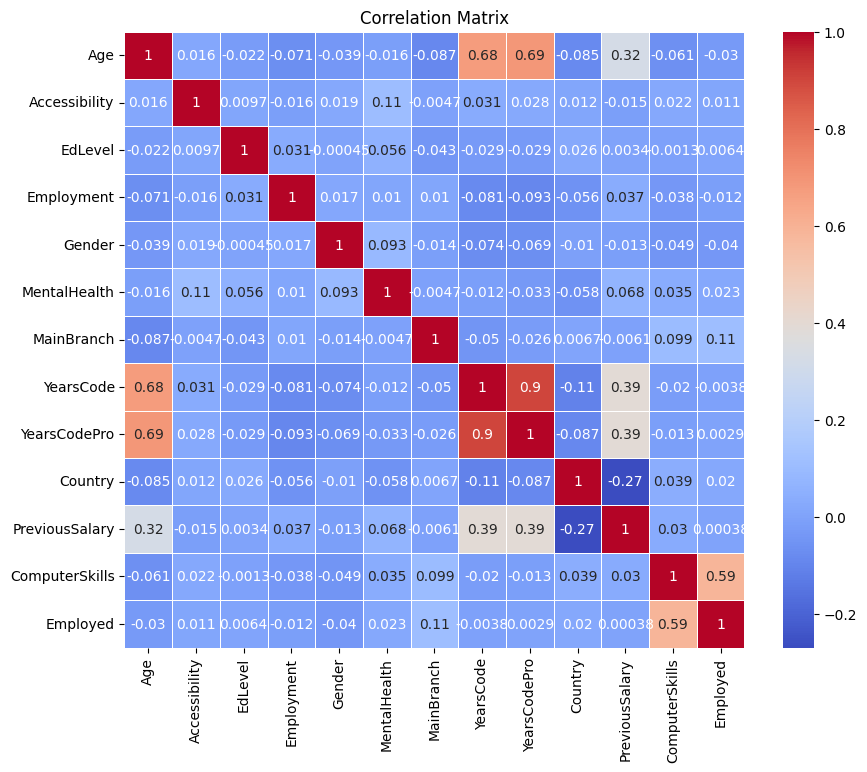

In [ ]:




correlation_matrix = new_data.corr()

# Creating corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

